# Answer

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [21]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets

In [22]:
# Data preprocessing
X_scaled = StandardScaler().fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance = explained_variance_ratio.cumsum()

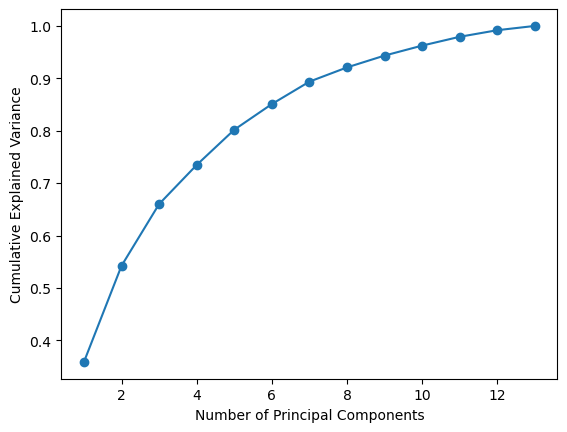

In [23]:
# Plot the cumulative explained variance
plt.plot(range(1, len(cum_explained_variance) + 1), cum_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

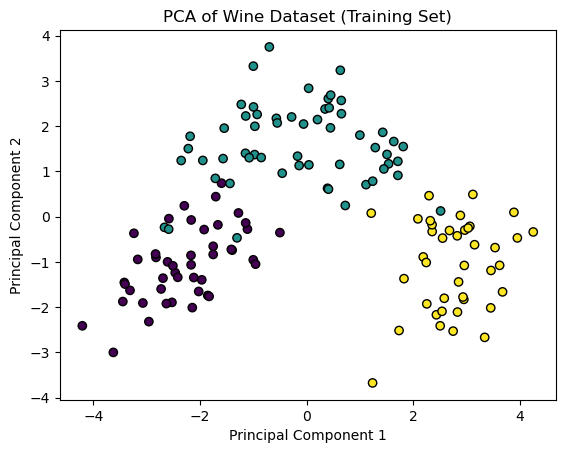

In [24]:
# Convert class labels to numeric values
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
# Visualize the results of PCA using a scatter plot
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_numeric, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (Training Set)')
plt.show()

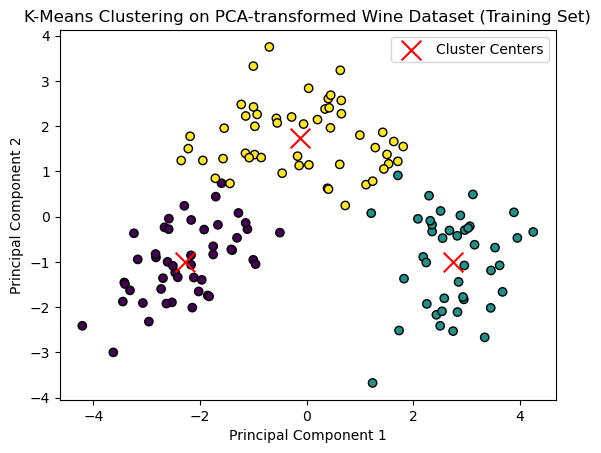

In [25]:
# Perform clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)
train_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-transformed Wine Dataset (Training Set)')
plt.legend()
plt.show()

# Evaluate the model on the test set (optional, depending on your goals)
test_labels = kmeans.predict(X_test_pca)